# Exploratory Data Analysis of ATLAS RPV and QCD Data

In this notebook, we use the pre-processed numpy data files for some exploratory work.
The files were produced from the Delphes ROOT files using the prepare_data.py script.
We will look at some summary information in these files and make some general physics plots.

In [1]:
# System imports
from __future__ import print_function
import os

# External imports
import numpy as np
import matplotlib.pyplot as plt

# Magic
%matplotlib notebook

## Prepare the data

Let's specify which data files we'll use and prepare some helper code for reading that data.

In [3]:
ls ../data

qcd_JZ3.npz


In [4]:
#input_dir = os.path.join(os.getenv('SCRATCH'), 'atlasdl', 'prod004')
input_dir = '../data'

In [5]:
ls $input_dir

qcd_JZ3.npz


In [13]:
#samples = ['qcd_JZ3', 'qcd_JZ4', 'qcd_JZ5', 'qcd_JZ6', 'qcd_JZ7',
#           'qcd_JZ8', 'qcd_JZ9', 'qcd_JZ10', 'qcd_JZ11', 'qcd_JZ12',
#           'rpv_1400_850']
samples = ['qcd_JZ3']

sample_files = list(map(lambda s: os.path.join(input_dir, s + '.npz'), samples))

In [14]:
sample_files

['../data/qcd_JZ3.npz']

In [20]:
def get_file_keys(file_name):
    """Retrieves the list of keys from an npz file"""
    with np.load(file_name) as f:
        keys = f.keys()
    return keys

def retrieve_data(file_name, *keys):
    """
    A helper function for retrieving some specified arrays from one npz file.
    Returns a list of arrays corresponding to the requested key name list.
    """
    with np.load(file_name, encoding='bytes') as f:
        try:
            data = [f[key] for key in keys]
        except KeyError as err:
            print('Requested key not found. Available keys:', f.keys())
            raise
    return data

## Data summary

Let's print out some basic information about the samples

In [21]:
def print_file_summary(file_name):
    print('File summary for', file_name)
    print('  Keys:', get_file_keys(file_name))
    totalEvents, skimEvents, passSR4J, passSR5J, xsec = retrieve_data(
        file_name, 'totalEvents', 'skimEvents', 'passSR4J', 'passSR5J', 'xsec')
    print('  Total events:', totalEvents.sum())
    print('  Skim events:', skimEvents.sum())
    print('  SR4J events:', passSR4J.sum())
    print('  SR5J events:', passSR5J.sum())
    print('  Cross sections:', np.unique(xsec))

In [22]:
for sample_file in sample_files:
    print_file_summary(sample_file)

File summary for ../data/qcd_JZ3.npz
  Keys: ['clusEta', 'skimEvents', 'clusPhi', 'trackPhi', 'eventNumber', 'proc', 'passSR', 'fatJetPt', 'fatJetEta', 'passSR5J', 'passSR4J', 'fatJetPhi', 'trackPt', 'clusE', 'inputFile', 'totalEvents', 'sumFatJetM', 'xsec', 'fatJetM', 'clusEM', 'trackEta']
  Total events: 3200000
  Skim events: 2044
  SR4J events: 0
  SR5J events: 0
  Cross sections: [ 164300.]


## Plotting and analysis utilities

Helper code for analyzing and plotting the data.

In [55]:
def make_object_histogram(sample_file, variable_key, num_bins, bin_range, normed=False):
    """Create a histogram of a requested variable from all objects in all events"""
    data, = retrieve_data(sample_file, variable_key)
    data_flat = np.concatenate(data)
    return np.histogram(data_flat, bins=num_bins, range=bin_range, normed=normed)

def make_object_histograms(sample_files, variable_key, num_bins, bin_range, normed=False):
    """Create object histograms for a list of sample files"""
    hists = []
    for sample_file in sample_files:
        hist, bins = make_object_histogram(sample_file, variable_key, num_bins, bin_range, normed)
        hists.append(hist)
    return hists, bins

def make_hist_line(hist, bins):
    """Takes a histogram and its bin edges and gives an X-Y plot array of the top edge"""
    X = np.array([bins[:-1], bins[1:]]).T.flatten()
    Y = np.array([hist, hist]).T.flatten()
    return X, Y

## Plot unweighted distributions

Let's make some basic plots of the samples, ignoring sample weights.

Here are some examples of using np.histogram with pyplot:
http://stackoverflow.com/questions/5328556/histogram-matplotlib

In [67]:
num_pt_bins, pt_bin_range = 50, (200, 1000)
jetPtHists, jetPtBins = make_object_histograms(
    sample_files, 'fatJetPt', num_pt_bins, pt_bin_range, normed=True)

In [76]:
num_mass_bins, mass_bin_range = 50, (0, 500)
jetMassHists, jetMassBins = make_object_histograms(
    sample_files, 'fatJetM', num_mass_bins, mass_bin_range, normed=True)

In [69]:
num_eta_bins, eta_bin_range = 50, (-2, 2)
jetEtaHists, jetEtaBins = make_object_histograms(
    sample_files, 'fatJetEta', num_eta_bins, eta_bin_range, normed=True)

In [73]:
num_phi_bins, phi_bin_range = 50, (-np.pi, np.pi)
jetPhiHists, jetPhiBins = make_object_histograms(
    sample_files, 'fatJetPhi', num_phi_bins, phi_bin_range, normed=True)

<IPython.core.display.Javascript object>


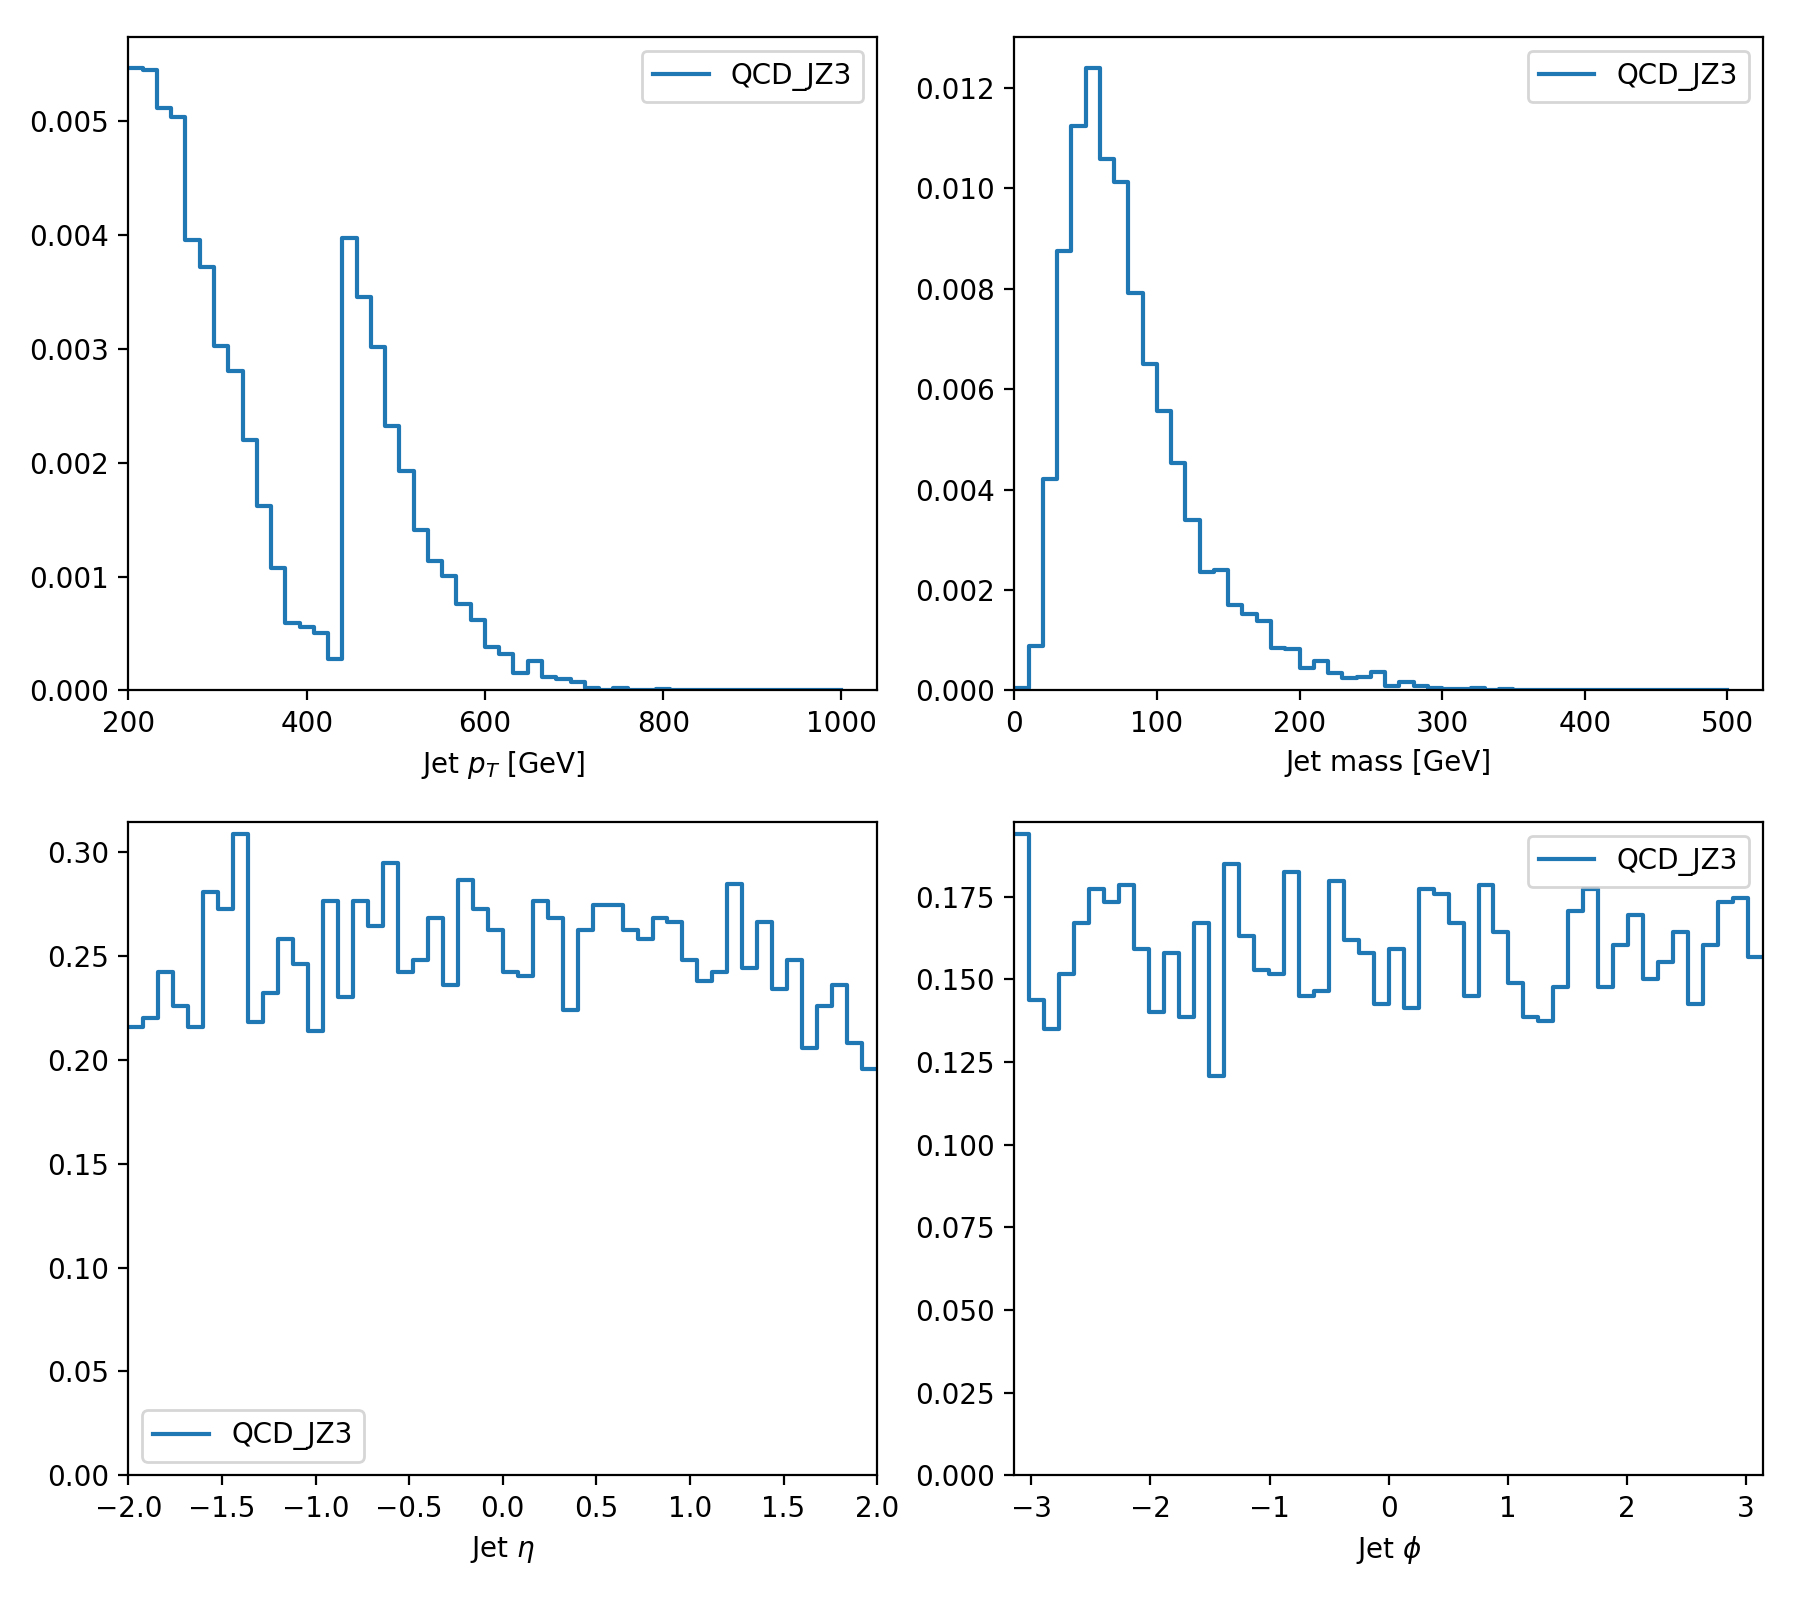

In [77]:
plt.figure(figsize=(9, 8))
labels = [s.upper().replace('.', ' ') for s in samples]

# Plot PT
plt.subplot(2, 2, 1)
for hist, label in zip(jetPtHists, labels):
    X, Y = make_hist_line(hist, jetPtBins)
    plt.plot(X, Y, label=label)
plt.xlim(xmin=200)
plt.ylim(ymin=0)
plt.xlabel('Jet $p_T$ [GeV]')
plt.legend(loc=0)

# Plot mass
plt.subplot(2, 2, 2)
for hist, label in zip(jetMassHists, labels):
    X, Y = make_hist_line(hist, jetMassBins)
    plt.plot(X, Y, label=label)
plt.xlim(xmin=0)
plt.ylim(ymin=0)
plt.xlabel('Jet mass [GeV]')
plt.legend(loc=0)

# Plot eta
plt.subplot(2, 2, 3)
for hist, label in zip(jetEtaHists, labels):
    X, Y = make_hist_line(hist, jetEtaBins)
    plt.plot(X, Y, label=label)
plt.ylim(ymin=0)
plt.xlim((-2, 2))
plt.xlabel('Jet $\eta$')
plt.legend(loc=0)

# Plot phi
plt.subplot(2, 2, 4)
for hist, label in zip(jetPhiHists, labels):
    X, Y = make_hist_line(hist, jetPhiBins)
    plt.plot(X, Y, label=label)
plt.ylim(ymin=0)
plt.xlim((-np.pi, np.pi))
plt.xlabel('Jet $\phi$')
plt.legend(loc=0)

plt.tight_layout()

## Calculating event weights

Now let's develop the code to calculate and apply event weights using the cross section.

To start with, the easiest thing to do is assume I am weighting one sample (with one cross section) at a time.

In [84]:
def get_event_weight(xsec, totalEvents, lumi=1.):
    one_xsec = np.unique(xsec)
    assert one_xsec.size == 1
    return one_xsec[0] * lumi / totalEvents.sum()

In [85]:
xsec, totalEvents, skimEvents = retrieve_data(sample_files[0], 'xsec', 'totalEvents', 'skimEvents')

In [91]:
eventWeights = np.full(skimEvents.sum(), get_event_weight(xsec, totalEvents))

In [92]:
eventWeights.shape

(2044,)